In [1]:
!pip install -q yfinance

# Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import pandas_datareader as web

yf.pdr_override()

from datetime import datetime

# Get Data

In [3]:
data = ['AAPL', 'AMZN', 'GOOG', 'BABA']

for stock in data:
    globals()[stock] = yf.download(stock, period='5y')

company_list = [AAPL, AMZN, GOOG, BABA]
company_name = ['AAPL', 'AMZN', 'GOOG', 'BABA']
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-02-05 00:00:00-05:00,39.775002,40.970001,39.000000,39.122501,37.201580,290954000,AAPL
2018-02-06 00:00:00-05:00,38.707500,40.930000,38.500000,40.757500,38.756302,272975200,AAPL
2018-02-07 00:00:00-05:00,40.772499,40.849998,39.767502,39.884998,37.926636,206434400,AAPL
2018-02-08 00:00:00-05:00,40.072498,40.250000,38.757500,38.787498,36.883030,217562000,AAPL
2018-02-09 00:00:00-05:00,39.267502,39.472500,37.560001,39.102501,37.334156,282690400,AAPL
...,...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,111.690002,113.150002,109.779999,111.199997,111.199997,21918200,BABA
2023-01-31 00:00:00-05:00,109.419998,112.080002,108.809998,110.199997,110.199997,15330000,BABA
2023-02-01 00:00:00-05:00,111.860001,113.949997,110.150002,112.820000,112.820000,16623000,BABA


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,120.705657,122.194522,119.115429,120.679713,120.370102,6.333163e+07
std,54.783566,55.362597,54.024646,54.704631,54.902731,5.275788e+07
min,35.994999,36.430000,35.500000,35.547501,34.309586,5.523000e+06
25%,76.000378,77.030125,75.161999,75.956747,75.896751,2.270950e+07
50%,114.837749,116.669750,113.225002,115.030251,114.796253,4.983260e+07
75%,159.274624,161.062504,157.035744,159.212505,159.057751,8.830050e+07
max,313.500000,319.320007,308.910004,317.140015,317.140015,4.265100e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2018-02-05 00:00:00-05:00 to 2023-02-03 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5036 non-null   float64
 1   High          5036 non-null   float64
 2   Low           5036 non-null   float64
 3   Close         5036 non-null   float64
 4   Adj Close     5036 non-null   float64
 5   Volume        5036 non-null   int64  
 6   company_name  5036 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 314.8+ KB


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

# Exploratory Data Analysis

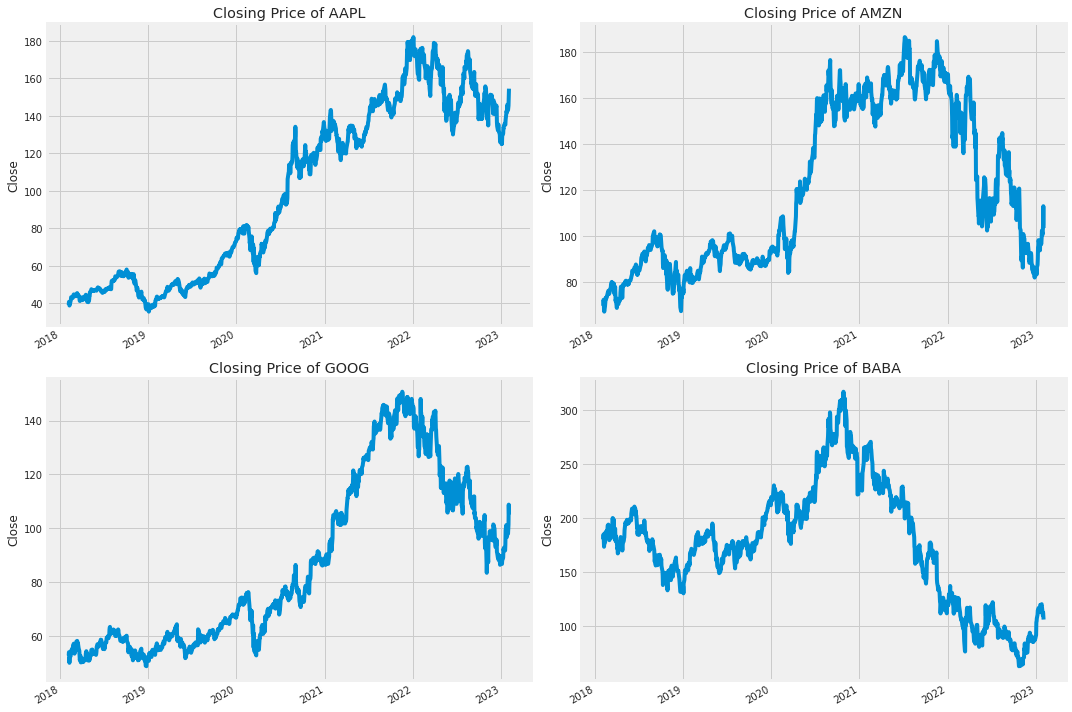

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {data[i-1]}")
  
    
plt.tight_layout()

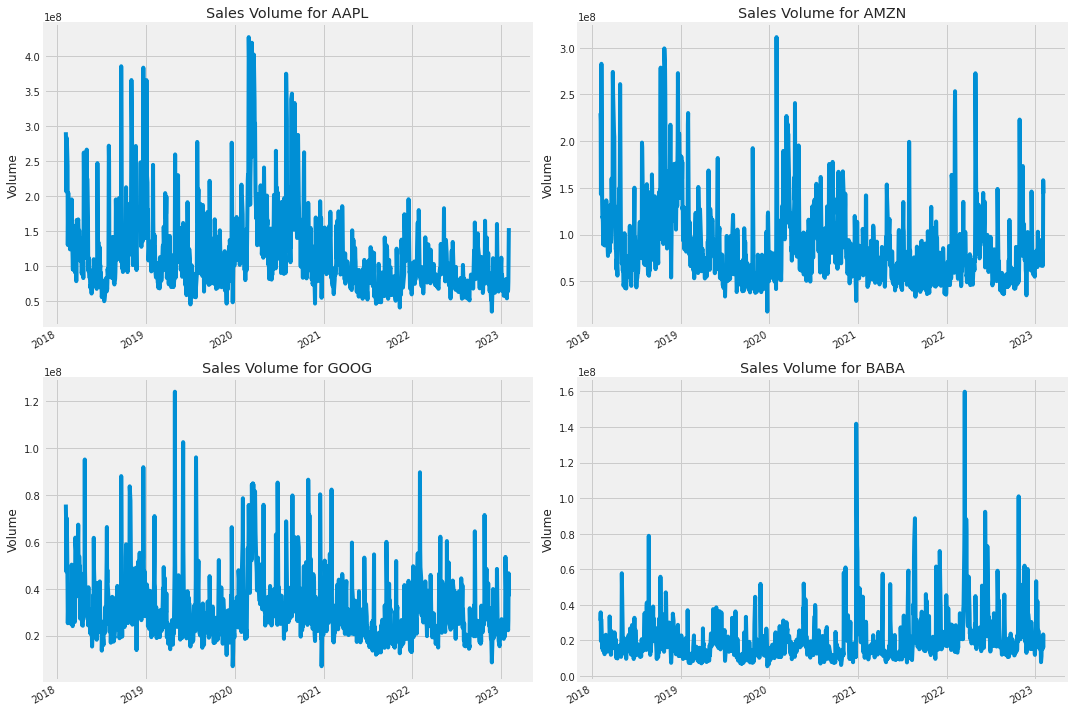

In [8]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {data[i-1]}")
    
plt.tight_layout()

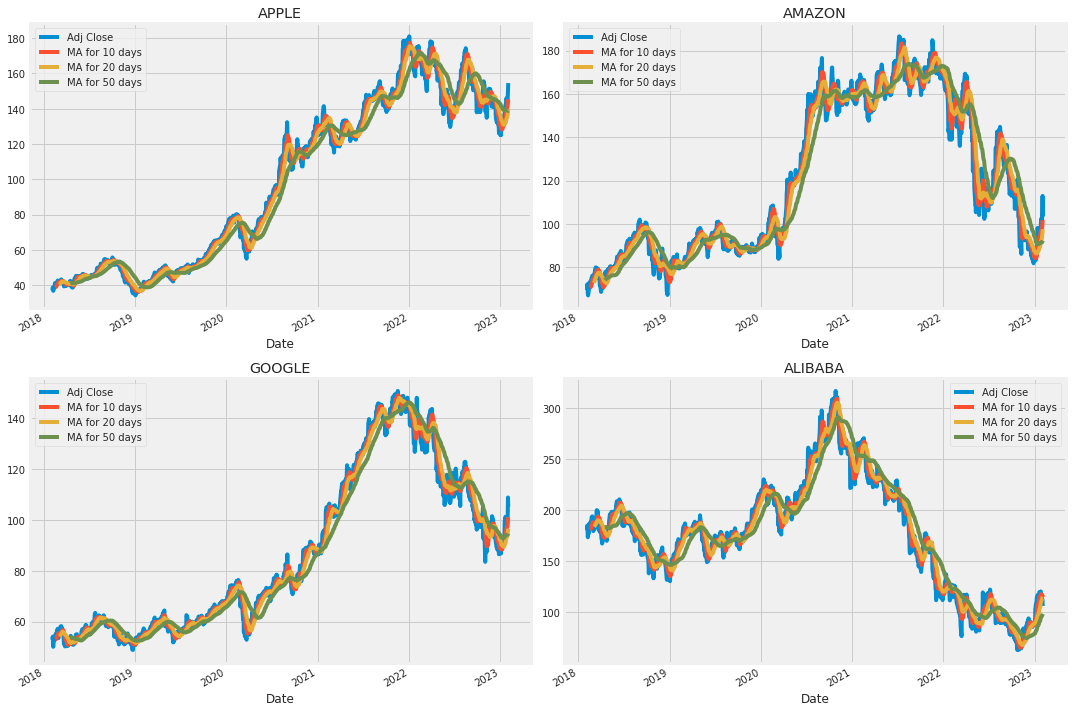

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMAZON')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GOOGLE')

BABA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('ALIBABA')

fig.tight_layout()

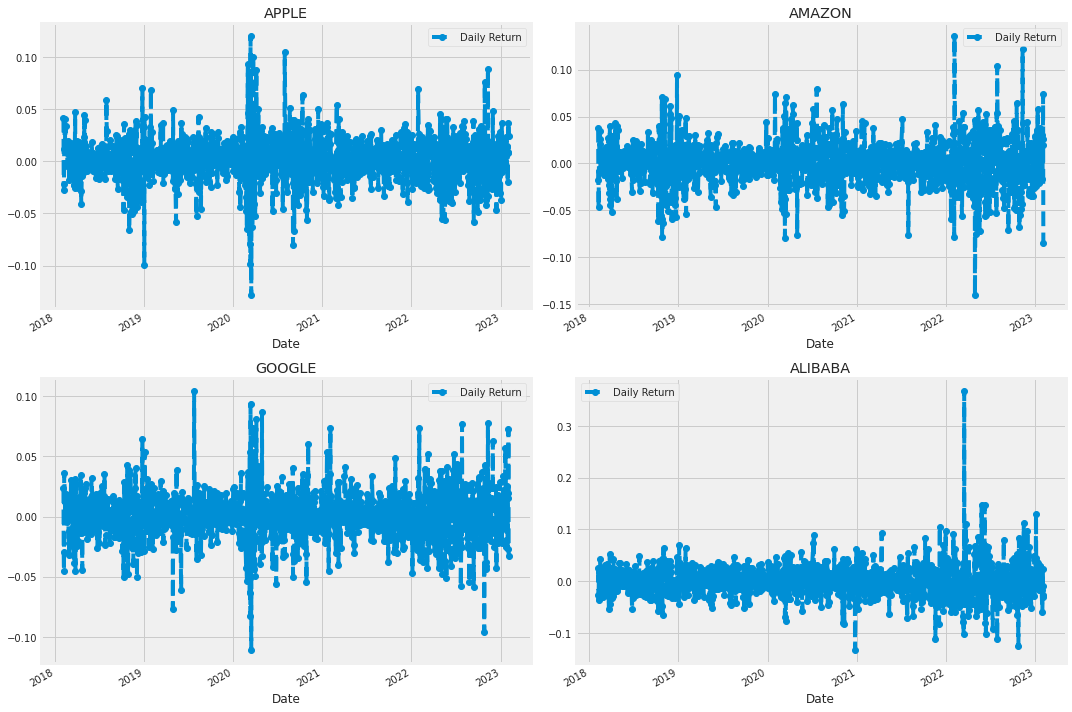

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plot Daily Percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

AMZN['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AMAZON')

GOOG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GOOGLE')

BABA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('ALIBABA')

fig.tight_layout()

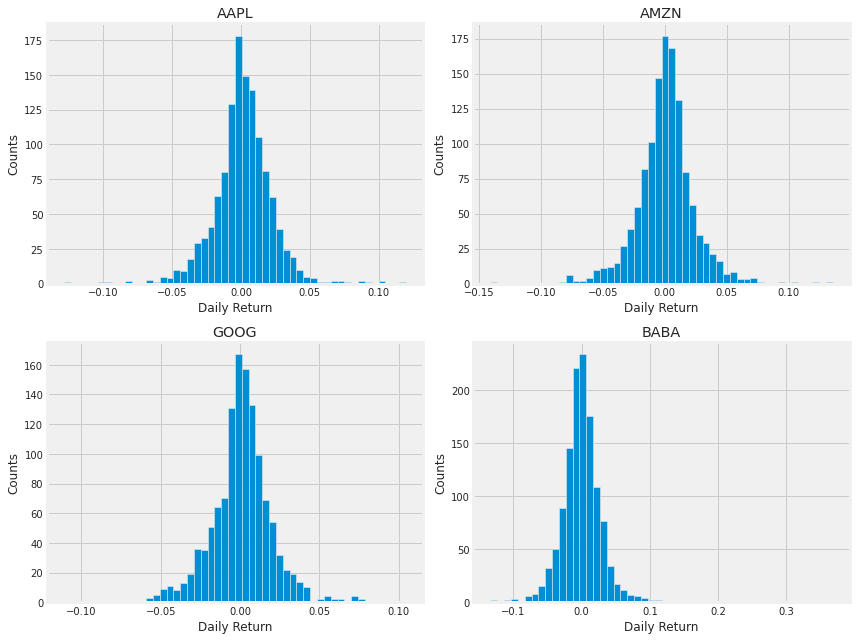

In [11]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [12]:
closing_df = pdr.get_data_yahoo(data)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,BABA,GOOG
Date,,,,
1980-12-12 00:00:00-05:00,NaN,NaN,NaN,NaN
1980-12-15 00:00:00-05:00,-0.052171,NaN,NaN,NaN
1980-12-16 00:00:00-05:00,-0.073398,NaN,NaN,NaN
1980-12-17 00:00:00-05:00,0.024751,NaN,NaN,NaN
1980-12-18 00:00:00-05:00,0.028992,NaN,NaN,NaN
...,...,...,...,...
2023-01-30 00:00:00-05:00,-0.020078,-0.016530,-0.060652,-0.027405
2023-01-31 00:00:00-05:00,0.009021,0.025659,-0.008993,0.019602
2023-02-01 00:00:00-05:00,0.007901,0.019587,0.023775,0.015620


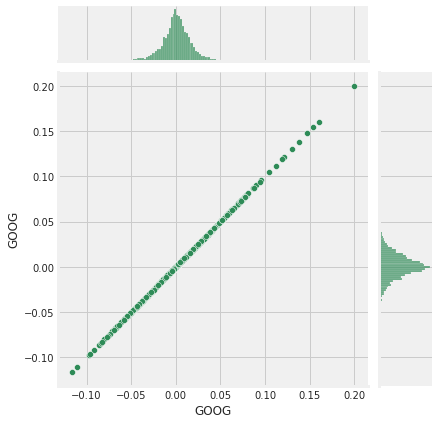

In [13]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

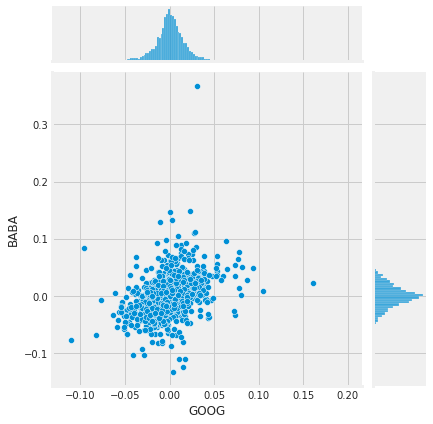

In [14]:
sns.jointplot(x='GOOG', y='BABA', data=tech_rets, kind='scatter')

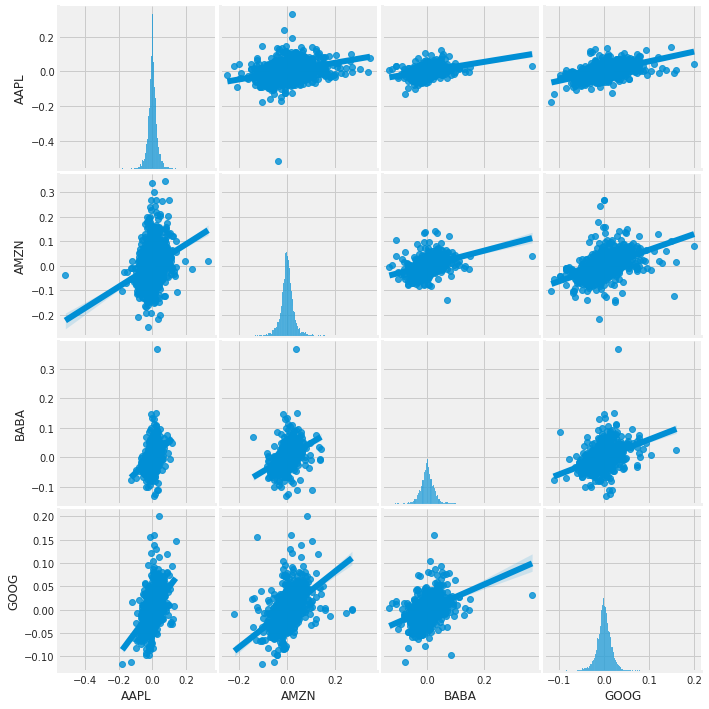

In [15]:
sns.pairplot(tech_rets, kind='reg')

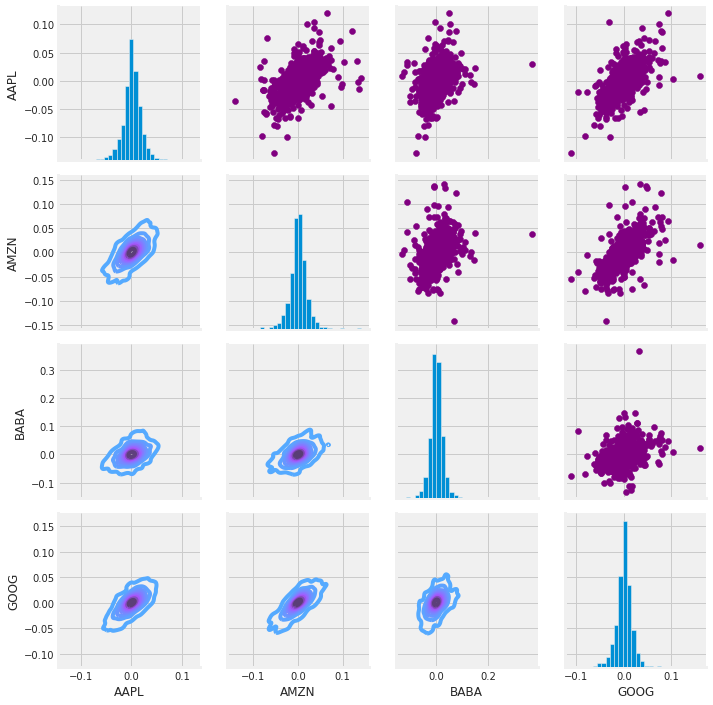

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

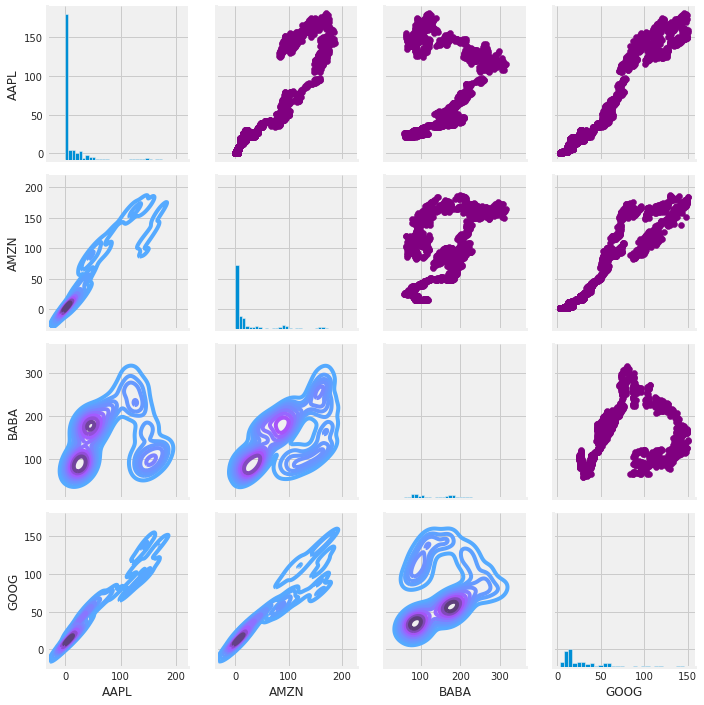

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

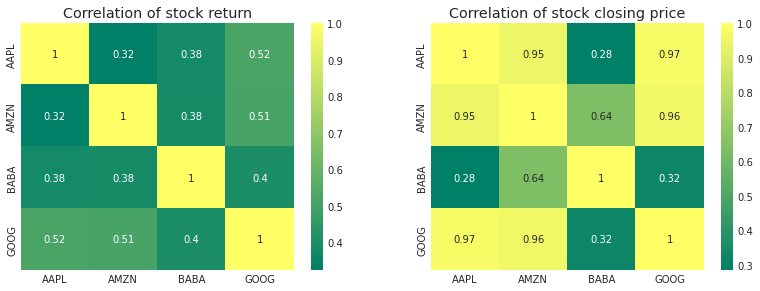

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

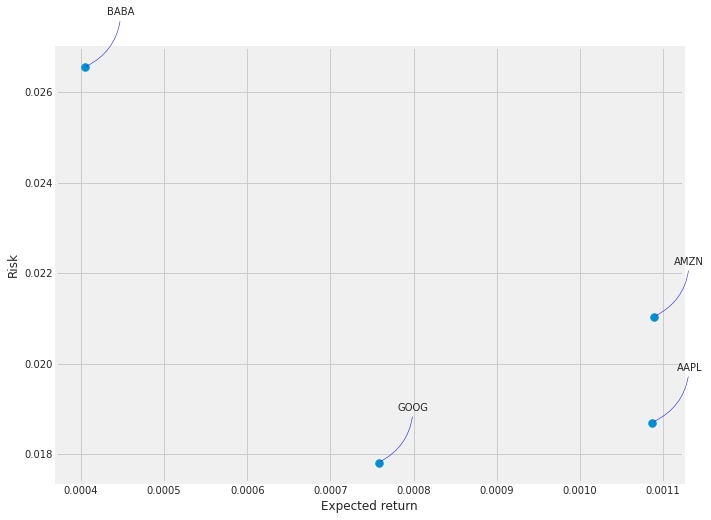

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# APPLE

In [20]:
AAPL = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519277,302220800
2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586555,260022000
2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859331,318292800
2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838938,394024400
...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,143.000000,64015300
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,144.289993,65874500
2023-02-01 00:00:00-05:00,143.970001,146.610001,141.320007,145.429993,145.429993,77663600


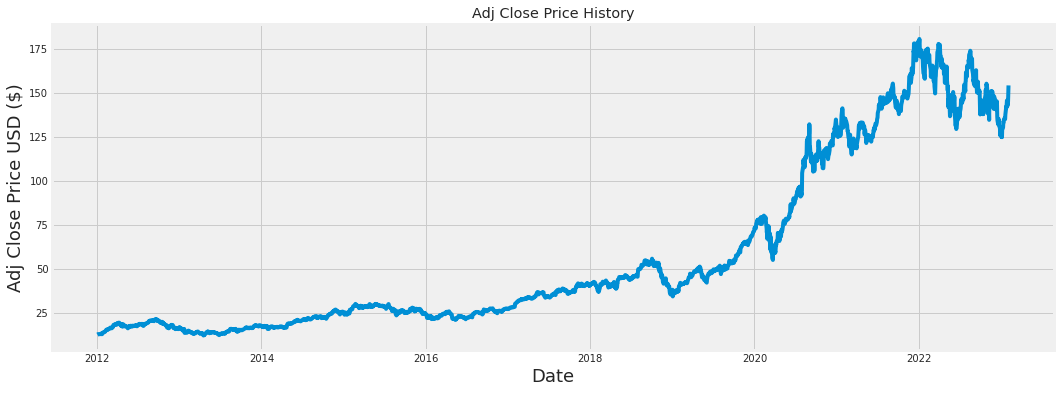

In [21]:
plt.figure(figsize=(16,6))
plt.title('Adj Close Price History')
plt.plot(AAPL['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = AAPL.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2652

## Preprocessing

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00269215],
       [0.0030905 ],
       [0.00391787],
       ...,
       [0.78963434],
       [0.82154772],
       [0.84333634]])

### Split data

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00269215, 0.0030905 , 0.00391787, 0.00470556, 0.00458482,
       0.00485698, 0.00473261, 0.00452349, 0.0042387 , 0.00512012,
       0.00591506, 0.00566991, 0.00432703, 0.00560862, 0.00434688,
       0.00907847, 0.00871255, 0.00919021, 0.01022304, 0.0108485 ,
       0.01079622, 0.01060339, 0.01142532, 0.01219858, 0.01307464,
       0.0144896 , 0.01746193, 0.01750697, 0.01916165, 0.02039818,
       0.01827308, 0.0190914 , 0.01907516, 0.02136977, 0.02104351,
       0.02164734, 0.02273245, 0.02333633, 0.0250757 , 0.02634288,
       0.02670878, 0.02683678, 0.02467016, 0.02414742, 0.02422494,
       0.02626175, 0.02683498, 0.02806605, 0.03096815, 0.03483994,
       0.03411532, 0.03411711, 0.03691638, 0.03779245, 0.03716878,
       0.03659918, 0.03600615, 0.03797624, 0.03932815, 0.03989414])]
[0.03849538777088332]

[array([0.00269215, 0.0030905 , 0.00391787, 0.00470556, 0.00458482,
       0.00485698, 0.00473261, 0.00452349, 0.0042387 , 0.00512012,
       0.00591506, 0.00566991, 0.00

## LSTM Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2592/2592 [==============================] - 86s 32ms/step - loss: 0.0011


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 27ms/step


6.751846319471289

<ipython-input-27-50f537af45e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_AAPL['Predictions'] = predictions


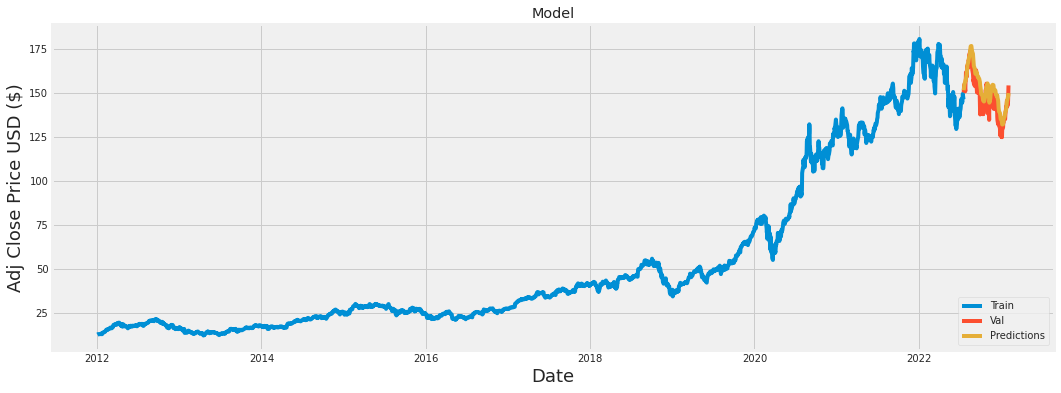

In [27]:
# Plot the data
train = data[:training_data_len]
valid_AAPL = data[training_data_len:]
valid_AAPL['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid_AAPL[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
valid_AAPL

,Adj Close,Predictions
Date,,
2022-07-19 00:00:00-04:00,150.540817,151.740280
2022-07-20 00:00:00-04:00,152.574615,152.543594
2022-07-21 00:00:00-04:00,154.877594,153.690979
2022-07-22 00:00:00-04:00,153.621414,155.184158
2022-07-25 00:00:00-04:00,152.484894,156.359116
...,...,...
2023-01-30 00:00:00-05:00,143.000000,146.926819
2023-01-31 00:00:00-05:00,144.289993,147.655701
2023-02-01 00:00:00-05:00,145.429993,148.195419


# AMAZON

In [29]:
AMZN = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
AMZN

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04 00:00:00-05:00,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05 00:00:00-05:00,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06 00:00:00-05:00,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09 00:00:00-05:00,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,101.089996,101.739998,99.010002,100.550003,100.550003,70691900
2023-01-31 00:00:00-05:00,101.160004,103.349998,101.139999,103.129997,103.129997,66527300
2023-02-01 00:00:00-05:00,102.529999,106.239998,101.239998,105.150002,105.150002,80450100


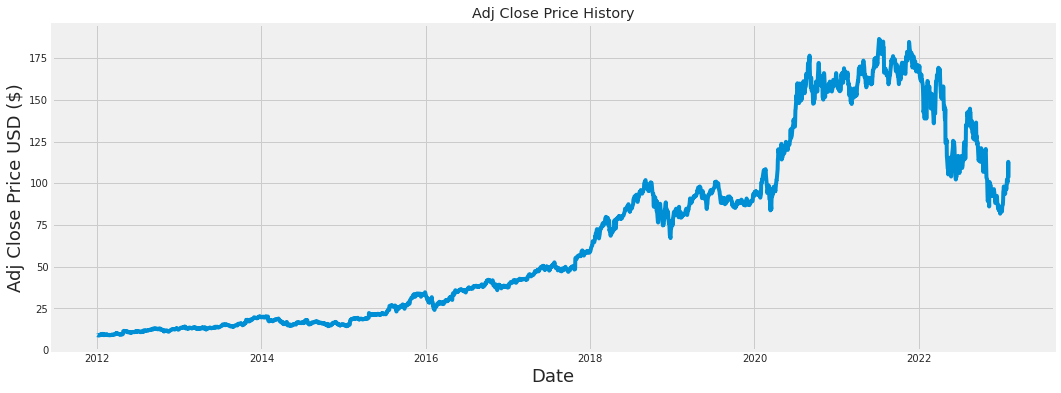

In [30]:
plt.figure(figsize=(16,6))
plt.title('Adj Close Price History')
plt.plot(AMZN['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [31]:
# Create a new dataframe with only the 'Close column 
data = AMZN.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2652

## Preprocessing

In [32]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [5.41999976e-01],
       [5.85650917e-01],
       [5.32099754e-01]])

### Split data

In [33]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

## LSTM Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2592/2592 [==============================] - 84s 32ms/step - loss: 0.0014


In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 31ms/step


5.525766999162214

<ipython-input-36-0b6b5f414abd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_AMZN['Predictions'] = predictions


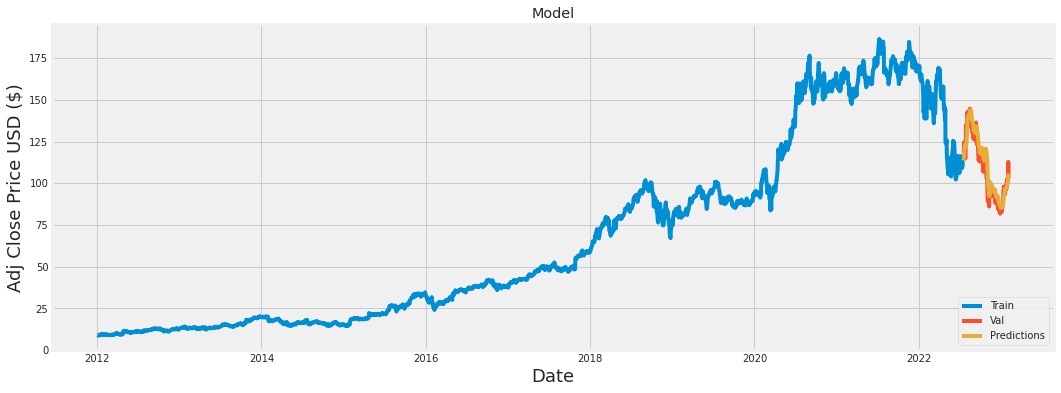

In [36]:
# Plot the data
train = data[:training_data_len]
valid_AMZN = data[training_data_len:]
valid_AMZN['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid_AMZN[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
valid_AMZN

,Adj Close,Predictions
Date,,
2022-07-19 00:00:00-04:00,118.209999,113.810959
2022-07-20 00:00:00-04:00,122.769997,115.307205
2022-07-21 00:00:00-04:00,124.629997,117.828140
2022-07-22 00:00:00-04:00,122.419998,120.612282
2022-07-25 00:00:00-04:00,121.139999,122.440666
...,...,...
2023-01-30 00:00:00-05:00,100.550003,99.511765
2023-01-31 00:00:00-05:00,103.129997,100.472961
2023-02-01 00:00:00-05:00,105.150002,101.655258


# GOOGLE

In [38]:
GOOG = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
# Show teh data
GOOG

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04 00:00:00-05:00,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05 00:00:00-05:00,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06 00:00:00-05:00,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09 00:00:00-05:00,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,98.745003,99.408997,97.519997,97.949997,97.949997,24365100
2023-01-31 00:00:00-05:00,97.860001,99.910004,97.790001,99.870003,99.870003,22306800
2023-02-01 00:00:00-05:00,99.739998,102.190002,98.419998,101.430000,101.430000,26392600


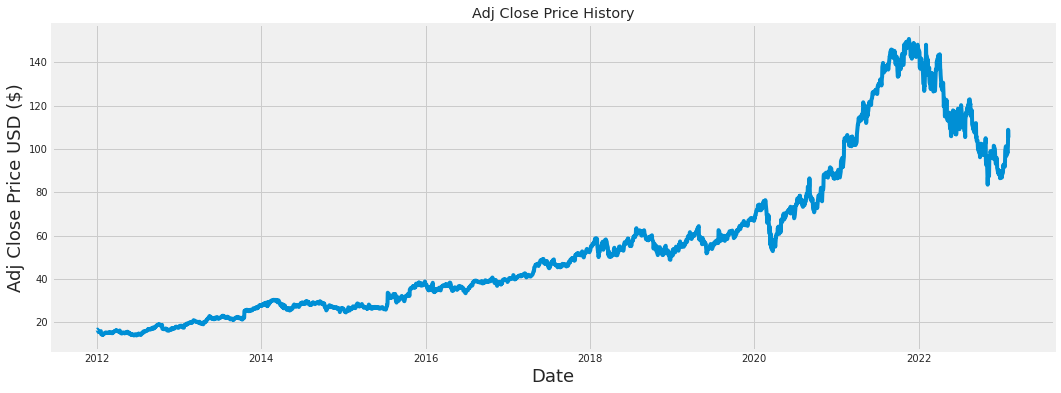

In [39]:
plt.figure(figsize=(16,6))
plt.title('Adj Close Price History')
plt.plot(GOOG['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

## Preprocessing

In [40]:
# Create a new dataframe with only the 'Close column 
data = GOOG.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2652

### Split data

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.63973374],
       [0.69361396],
       [0.66744147]])

In [42]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.0049054 , 0.00481982, 0.00398405,
       0.00190098, 0.00164788, 0.00381107, 0.00339409, 0.00383474,
       0.00396584, 0.00474516, 0.00678818, 0.0091116 , 0.00868915,
       0.00924998, 0.00954313, 0.00853256, 0.00967788, 0.00923359,
       0.00846883, 0.00864363, 0.00830131, 0.01000563, 0.00890219,
       0.00856898, 0.00925908, 0.00915165, 0.01080499, 0.01077951,
       0.01153516, 0.01132576, 0.01005116, 0.00835958, 0.00869461,
       0.00875653, 0.00750196, 0.00839417, 0.01069392, 0.01036799,
       0.01130392, 0.01201587, 0.01364372, 0.01355449, 0.01473623,
       0.01584149, 0.01521148, 0.01643874, 0.01601812, 0.01760955])]
[0.01627122404731983]

[array([0.01936668, 0.01988927, 0.01820133, 0.01656439, 0.01154608,
       0.0116699 , 0.01218339, 0.01285346, 0.01200676, 0.01266045,
       0.01344889, 0.01466158, 0.00

## LSTM Model

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2592/2592 [==============================] - 84s 32ms/step - loss: 0.0019


In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 63ms/step


4.909572488411486

<ipython-input-45-97ba8dc9a882>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_GOOG['Predictions'] = predictions


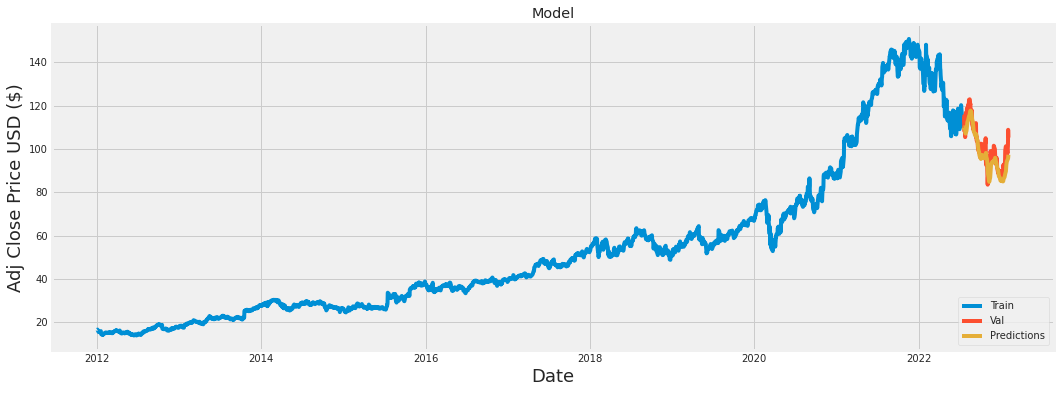

In [45]:
# Plot the data
train = data[:training_data_len]
valid_GOOG = data[training_data_len:]
valid_GOOG['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid_GOOG[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
valid_GOOG

,Adj Close,Predictions
Date,,
2022-07-19 00:00:00-04:00,114.620003,109.907791
2022-07-20 00:00:00-04:00,114.699997,109.600975
2022-07-21 00:00:00-04:00,115.040001,109.648201
2022-07-22 00:00:00-04:00,108.360001,109.924675
2022-07-25 00:00:00-04:00,108.209999,109.422920
...,...,...
2023-01-30 00:00:00-05:00,97.949997,94.835938
2023-01-31 00:00:00-05:00,99.870003,95.131744
2023-02-01 00:00:00-05:00,101.430000,95.427895


# ALI BABA

In [47]:
BABA = pdr.get_data_yahoo('BABA', start='2012-01-01', end=datetime.now())
# Show teh data
BABA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19 00:00:00-04:00,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
2014-09-22 00:00:00-04:00,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2014-09-23 00:00:00-04:00,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
2014-09-24 00:00:00-04:00,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
2014-09-25 00:00:00-04:00,91.089996,91.500000,88.500000,88.919998,88.919998,28598000
...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,111.690002,113.150002,109.779999,111.199997,111.199997,21918200
2023-01-31 00:00:00-05:00,109.419998,112.080002,108.809998,110.199997,110.199997,15330000
2023-02-01 00:00:00-05:00,111.860001,113.949997,110.150002,112.820000,112.820000,16623000


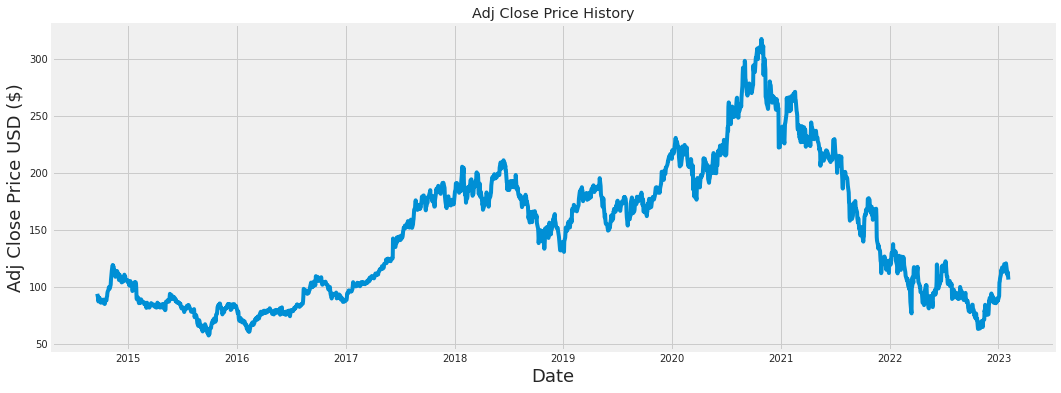

In [48]:
plt.figure(figsize=(16,6))
plt.title('Adj Close Price History')
plt.plot(BABA['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [49]:
# Create a new dataframe with only the 'Close column 
data = BABA.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2004

## Preprocessing

In [50]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14051972],
       [0.1251203 ],
       [0.11464869],
       ...,
       [0.21339749],
       [0.20153992],
       [0.18841193]])

### Split data

In [51]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.14051972, 0.1251203 , 0.11464869, 0.1277382 , 0.12138594,
       0.12731472, 0.12073147, 0.12111645, 0.11052935, 0.1142252 ,
       0.11822906, 0.11903752, 0.11657362, 0.11899904, 0.12088547,
       0.10968237, 0.1067565 , 0.10610201, 0.10860442, 0.12111645,
       0.1174976 , 0.11884505, 0.12900866, 0.13181904, 0.14267563,
       0.14771896, 0.15553416, 0.16281039, 0.15753608, 0.15915304,
       0.15865254, 0.17097209, 0.18741096, 0.19742058, 0.20858517,
       0.22009623, 0.23776708, 0.22001924, 0.2341097 , 0.22117418,
       0.22217515, 0.21890278, 0.20565927, 0.19799806, 0.20184792,
       0.2053513 , 0.21763232, 0.2158999 , 0.21282   , 0.20885466,
       0.18710297, 0.20211741, 0.2050048 , 0.19934551, 0.1944562 ,
       0.18356111, 0.19283927, 0.17897977, 0.18317613, 0.1837151 ])]
[0.18213664977635818]

[array([0.14051972, 0.1251203 , 0.11464869, 0.1277382 , 0.12138594,
       0.12731472, 0.12073147, 0.12111645, 0.11052935, 0.1142252 ,
       0.11822906, 0.11903752, 0.11

## LSTM Model

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1944/1944 [==============================] - 67s 33ms/step - loss: 0.0018


In [53]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 31ms/step


10.85133869362707

<ipython-input-54-f98f1935f1d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_BABA['Predictions'] = predictions


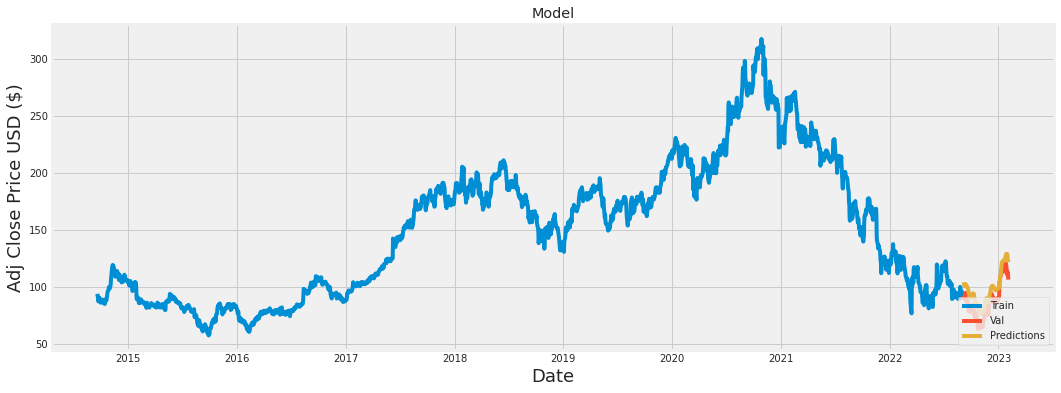

In [54]:
# Plot the data
train = data[:training_data_len]
valid_BABA = data[training_data_len:]
valid_BABA['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid_BABA[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [55]:
valid_BABA

,Adj Close,Predictions
Date,,
2022-09-06 00:00:00-04:00,88.449997,103.964706
2022-09-07 00:00:00-04:00,90.599998,102.098297
2022-09-08 00:00:00-04:00,89.519997,101.082916
2022-09-09 00:00:00-04:00,92.139999,100.424400
2022-09-12 00:00:00-04:00,94.690002,100.787750
...,...,...
2023-01-30 00:00:00-05:00,111.199997,128.807388
2023-01-31 00:00:00-05:00,110.199997,126.579468
2023-02-01 00:00:00-05:00,112.820000,123.990311
